In [ ]:
# from gensim import corpora, models, similarities
# from collections import defaultdict
# from pprint import pprint
# from openpyxl import Workbook, load_workbook

# wb = load_workbook(filename = 'data/GICS_map2014.xlsx')
# sheet_list = wb['Descriptions']
# file_ob = open("Description.txt",'a')
# for i in range(6,346,2):
#     s = 'H' + str(i)
#     s1 = 'H' + str(i+1)
#     print(sheet_list[s].value + ": " + sheet_list[s1].value) 
#     file_ob.write(sheet_list[s].value + ": " + sheet_list[s1].value + "\n")
# file_ob.close()

# file2 = open("Description.txt",'r')
# docs = file2.read().split("\n")
# print len(docs)

from lda2vec import preprocess, Corpus
from openpyxl import Workbook, load_workbook
import wikipedia
#pyLDAvis.enable_notebook()

# wb = load_workbook(filename = 'GICS_map2014.xlsx')
# sheet_list = wb['S&P List']

for company in test:
    w = wikipedia.page(company,auto_suggest=True)
    file_ob = open("test/" + company + ".txt",'w')
    cont = u''.join(w.content).encode('utf-8').strip()
    file_ob.write(cont)
    file_ob.close()

In [30]:
from boilerpipe.extract import Extractor
from openpyxl import Workbook, load_workbook
# from http.cookiejar import CookieJar
# import urllib2
# import urllib
# from cookielib import CookieJar

# cj = CookieJar()
# opener = urllib2.build_opener(urllib2.HTTPCookieProcessor())
# print opener
# response = opener.open('http://news.google.com/news/url?sa=t&fd=R&ct2=us&usg=AFQjCNEcW4q4ks2i_CmJgg9C_2QqpXAlJA&clid=c3a7d30bb8a4878e06b80cf16b898331&cid=52779142765403&ei=oeZ1V6izMNGLhQHrh7OYDg&url=http://www.breitbart.com/california/2016/06/30/one-week-brexit-uk-stocks-higher/')
# extractor = Extractor(extractor='ArticleExtractor', url=opener)

wb = load_workbook(filename = 'testdata/GoogleNews_5July.xlsx')
sheet_list = wb['feedly.com_5th_Jul_2016.csv']

for i in range(77,1318):
    try:
        s = 'A' + str(i)
        extractor = Extractor(extractor='ArticleExtractor', url=sheet_list[s].value)
        extracted_text = extractor.getText()
        file_ob = open("testdata/GoogleNews_5July/Article"+str(i)+".txt",'w')
        file_ob.write(u''.join(extracted_text).encode('utf-8').strip())
        file_ob.close()
    except Exception, e:
      continue
        

In [33]:
import os
import shutil
src_files = os.listdir("testdata/GoogleNews_5July/")
i=0
listfinal = []
names = []
for file_name in sorted(src_files,key = lambda name : (int)(name[7:name.find(".")])):
    full_file_name = os.path.join("testdata/GoogleNews_5July/", file_name)
    file_ob = open(full_file_name,'r')
    listfinal.insert(i,file_ob.read().replace("\n"," ").replace("==","").lower().decode(encoding='UTF-8',errors='ignore'))
    names.insert(i,file_name[:-4])
    i=i+1
    file_ob.close()

src_files = os.listdir("sectorData/Sectors/")
    
for file_name in src_files:
    full_file_name = os.path.join("sectorData/Sectors/", file_name)
    file_ob = open(full_file_name,'r')
    listfinal.insert(i,file_ob.read().replace("\n"," ").replace("==","").lower().decode(encoding='UTF-8',errors='ignore'))
    names.insert(i,file_name[:-4])
    i=i+1
    file_ob.close()
    
for name in names:
    print name

Article1
Article2
Article3
Article4
Article5
Article8
Article9
Article10
Article11
Article12
Article13
Article14
Article15
Article16
Article17
Article18
Article19
Article20
Article21
Article22
Article23
Article24
Article25
Article27
Article28
Article30
Article31
Article32
Article33
Article34
Article35
Article36
Article37
Article39
Article40
Article41
Article42
Article43
Article46
Article47
Article48
Article49
Article50
Article51
Article52
Article53
Article55
Article56
Article57
Article58
Article59
Article61
Article62
Article63
Article64
Article65
Article66
Article67
Article68
Article69
Article70
Article72
Article73
Article74
Article75
Article78
Article79
Article81
Article82
Article83
Article84
Article85
Article86
Article87
Article88
Article89
Article90
Article92
Article93
Article94
Article95
Article96
Article97
Article98
Article99
Article100
Article101
Article102
Article103
Article104
Article105
Article106
Article107
Article108
Article109
Article110
Article111
Article113
Article116
Art

In [34]:
#Preprocess

import pickle
import numpy as np
import spacy
from lda2vec import preprocess, Corpus
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import string

en_nlp = spacy.load('en')
texts = listfinal

# Remove tokens with these substrings
bad = ["-----", "---", "...", "“", "”", "'ve","^^^","ax>", '`@("','==', '===', '^^^',"    ","   ","  "]
SYMBOLS = " ".join(string.punctuation).split(" ")

STOPLIST = set(["n't", "'s", "'m", "ca"] + list(ENGLISH_STOP_WORDS) + ['s', 't', 'just', 'don', 'd', 'llm', 'o', 're', 've', 'y', 'ain', 'aren', 
                                                                       'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 
                                                                       'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']) 



def clean(line):
      line  = ''.join(ch for ch in line if ch.isdigit()==False)
      line  = ' '.join(w for w in line.split(' ') if w not in bad)
      line  = ''.join(ch for ch in line if ch not in SYMBOLS)
#     line  = ' '.join(w for w in line.split(' ') if w not in STOPLIST)
      return line


# Preprocess data
                    
max_length = 10000   # Limit of 10k words per document
# Convert to unicode (spaCy only works with unicode)
texts = [unicode(clean(d)) for d in texts]
                 
tokens, vocab = preprocess.tokenize(texts, max_length, merge=True,n_threads=4) 
# try merge = True for getting phrases as tokens

print "Tokenization complete..."
corpus = Corpus()

# Make a ranked list of rare vs frequent words over entire corpus
corpus.update_word_count(tokens)
corpus.finalize()

# The tokenization uses spaCy indices, and so may have gaps
# between indices for words that aren't present in our dataset.
# This builds a new compact index
compact = corpus.to_compact(tokens)

# Remove extremely rare words
pruned = corpus.filter_count(compact, min_count=1)

# Convert the compactified arrays into bag of words arrays
bow = corpus.compact_to_bow(compact)

# Words tend to have power law frequency, so selectively
# downsample the most prevalent words
clean = corpus.subsample_frequent(bow)

# Now flatten a 2D array of document per row and word position
# per column to a 1D array of words. This will also remove skips
# and OoV words
doc_ids = np.arange(pruned.shape[0])
flattened, (doc_ids,) = corpus.compact_to_flat(compact, doc_ids)
assert flattened.min() >= 0

# Fill in the pretrained word vectors
fn_wordvc = 'old_data/GoogleNews-vectors-negative300.bin'
vectors, s, f = corpus.compact_word_vectors(vocab, filename=fn_wordvc)

# Save all of the preprocessed files 
pickle.dump(vocab, open('vocab.pkl', 'w'))
pickle.dump(corpus, open('corpus.pkl', 'w'))

np.save("flattened", flattened)
np.save("doc_ids", doc_ids)
np.save("pruned", pruned)
np.save("bow", bow)
np.save("vectors", vectors)

/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/ipykernel/__main__.py:25: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Tokenization complete...
[[   4592    2171    1220 ...,      -2      -2      -2]
 [   4237     469 1515907 ...,      -2      -2      -2]
 [    691    3348     485 ...,      -2      -2      -2]
 ..., 
 [  12458     470   12819 ...,      -2      -2      -2]
 [   4427    4351     492 ...,      -2      -2      -2]
 [    466 1544423     474 ...,      -2      -2      -2]]
[     -2      -1      -2 ..., 1523201 1523200 1516881]
[    0     1     2 ..., 57326 57327 57328]
26 ”  -->  上
27 “  -->  上
87 —  -->  上
172 ’  -->  上
208 –  -->  上
368 ‘  -->  上


In [35]:
print tokens
print compact
print pruned
print bow
print clean
print s,f
print vectors
print len(vocab)
print len(vectors)

[[   4592    2171    1220 ...,      -2      -2      -2]
 [   4237     469 1515907 ...,      -2      -2      -2]
 [    691    3348     485 ...,      -2      -2      -2]
 ..., 
 [  12458     470   12819 ...,      -2      -2      -2]
 [   4427    4351     492 ...,      -2      -2      -2]
 [    466 1544423     474 ...,      -2      -2      -2]]
[[ 1823   802  1527 ...,     0     0     0]
 [  323     4 44439 ...,     0     0     0]
 [  415   766    11 ...,     0     0     0]
 ..., 
 [13261     8  9732 ...,     0     0     0]
 [ 2473  2789    32 ...,     0     0     0]
 [    3  6533    13 ...,     0     0     0]]
[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]
[[9903    0    0 ...,    0    0    0]
 [9733    0    0 ...,    0    0    0]
 [9454    0    0 ...,    0    0    0]
 ..., 
 [9750    0    0 ...,    0    0    0]
 [9788    0    0 ...,    0    0    0]
 [8002    0    0 ...,    0    0    0]]
[[9903    0    0 ...

In [36]:
#LDA2VEC MODEL

from lda2vec import EmbedMixture
from lda2vec import dirichlet_likelihood
from lda2vec.utils import move

from chainer import Chain
import chainer.links as L
import chainer.functions as F

import numpy as np


class LDA2Vec(Chain):
    def __init__(self, n_documents=100, n_document_topics=10,
                 n_units=256, n_vocab=1000, dropout_ratio=0.5, train=True,
                 counts=None, n_samples=15, word_dropout_ratio=0.0,
                 power=0.75, temperature=1.0):
        em = EmbedMixture(n_documents, n_document_topics, n_units,
                          dropout_ratio=dropout_ratio, temperature=temperature)
        kwargs = {}
        kwargs['mixture'] = em
        kwargs['sampler'] = L.NegativeSampling(n_units, counts, n_samples,
                                               power=power)
        super(LDA2Vec, self).__init__(**kwargs)
        rand = np.random.random(self.sampler.W.data.shape)
        self.sampler.W.data[:, :] = rand[:, :]
        self.n_units = n_units
        self.train = train
        self.dropout_ratio = dropout_ratio
        self.word_dropout_ratio = word_dropout_ratio
        self.n_samples = n_samples

    def prior(self):
        dl1 = dirichlet_likelihood(self.mixture.weights)
        return dl1

    def fit_partial(self, rdoc_ids, rword_indices, window=5,
                    update_only_docs=False):
        doc_ids, word_indices = move(self.xp, rdoc_ids, rword_indices)
        pivot_idx = next(move(self.xp, rword_indices[window: -window]))
        pivot = F.embed_id(pivot_idx, self.sampler.W)
        if update_only_docs:
            pivot.unchain_backward()
        doc_at_pivot = rdoc_ids[window: -window]
        doc = self.mixture(next(move(self.xp, doc_at_pivot)),
                           update_only_docs=update_only_docs)
        loss = 0.0
        start, end = window, rword_indices.shape[0] - window
        context = (F.dropout(doc, self.dropout_ratio) +
                   F.dropout(pivot, self.dropout_ratio))
        for frame in range(-window, window + 1):
            # Skip predicting the current pivot
            if frame == 0:
                continue
            # Predict word given context and pivot word
            # The target starts before the pivot
            targetidx = rword_indices[start + frame: end + frame]
            doc_at_target = rdoc_ids[start + frame: end + frame]
            doc_is_same = doc_at_target == doc_at_pivot
            rand = np.random.uniform(0, 1, doc_is_same.shape[0])
            mask = (rand > self.word_dropout_ratio).astype('bool')
            weight = np.logical_and(doc_is_same, mask).astype('int32')
            # If weight is 1.0 then targetidx
            # If weight is 0.0 then -1
            targetidx = targetidx * weight + -1 * (1 - weight)
            target, = move(self.xp, targetidx)
            loss = self.sampler(context, target)
            loss.backward()
            if update_only_docs:
                # Wipe out any gradient accumulation on word vectors
                self.sampler.W.grad *= 0.0
        return loss.data


In [39]:
#RUN MODEL

import os
import os.path
import pickle
import time
import shelve
import unicodedata

import chainer
from chainer import cuda
from chainer import serializers
import chainer.optimizers as O
import numpy as np

from lda2vec import utils
from lda2vec import prepare_topics, print_top_words_per_topic, topic_coherence

gpu_id = int(os.getenv('CUDA_GPU', 0))
cuda.get_device(gpu_id).use()
print "Using GPU " + str(gpu_id)

data_dir = os.getenv('data_dir', 'model_5july')
fn_vocab = '{data_dir:s}/vocab.pkl'.format(data_dir=data_dir)
fn_corpus = '{data_dir:s}/corpus.pkl'.format(data_dir=data_dir)
fn_flatnd = '{data_dir:s}/flattened.npy'.format(data_dir=data_dir)
fn_docids = '{data_dir:s}/doc_ids.npy'.format(data_dir=data_dir)
fn_vectors = '{data_dir:s}/vectors.npy'.format(data_dir=data_dir)
vocab = pickle.load(open(fn_vocab, 'r'))
corpus = pickle.load(open(fn_corpus, 'r'))
flattened = np.load(fn_flatnd)
doc_ids = np.load(fn_docids)
vectors = np.load(fn_vectors)
# vectors = np.delete(vectors,77743,0)
# Model Parameters
# Number of documents
n_docs = doc_ids.max() + 1
# Number of unique words in the vocabulary
n_vocab = flattened.max()  + 1
# 'Strength' of the dircihlet prior; 200.0 seems to work well
clambda = 200.0
# Number of topics to fit
n_topics = int(os.getenv('n_topics', 100))
batchsize = 4096
# Power for neg sampling
power = float(os.getenv('power', 0.75))
# Intialize with pretrained word vectors
pretrained = bool(int(os.getenv('pretrained', True)))
# Sampling temperature
temperature = float(os.getenv('temperature', 1.0))
# Number of dimensions in a single word vector
n_units = int(os.getenv('n_units', 300))
# Get the string representation for every compact key
words = corpus.word_list(vocab)[:n_vocab]
# How many tokens are in each document
doc_idx, lengths = np.unique(doc_ids, return_counts=True)
doc_lengths = np.zeros(doc_ids.max() + 1, dtype='int32')
doc_lengths[doc_idx] = lengths
# Count all token frequencies
tok_idx, freq = np.unique(flattened, return_counts=True)
term_frequency = np.zeros(n_vocab, dtype='int32')
term_frequency[tok_idx] = freq

for key in sorted(locals().keys()):
    val = locals()[key]
    val = unicodedata.normalize('NFKD', unicode(val)).encode('ascii','ignore')
    if len(str(val)) < 100 and '<' not in str(val):
        print key, val

model = LDA2Vec(n_documents=n_docs, n_document_topics=n_topics,
                n_units=n_units, n_vocab=n_vocab, counts=term_frequency,
                n_samples=15, power=power, temperature=temperature)
if os.path.exists('lda2vec.hdf5'):
    print "Reloading from saved"
    serializers.load_hdf5("lda2vec.hdf5", model)

vectors = np.resize(vectors,(57329,300))
if pretrained:
    model.sampler.W.data[:, :] = vectors[:n_vocab, :]
model.to_gpu()
optimizer = O.Adam()
optimizer.setup(model)
clip = chainer.optimizer.GradientClipping(5.0)
optimizer.add_hook(clip)

print model.sampler.W.data.shape[0]
print len(words)
j = 0
epoch = 0
fraction = batchsize * 1.0 / flattened.shape[0]
progress = shelve.open('progress.shelve')
for epoch in range(100):
    data = prepare_topics(cuda.to_cpu(model.mixture.weights.W.data).copy(),
                          cuda.to_cpu(model.mixture.factors.W.data).copy(),
                          cuda.to_cpu(model.sampler.W.data).copy(),
                          words)
    top_words = print_top_words_per_topic(data,do_print=False)
    if j % 100 == 0 and j > 100:
        coherence = topic_coherence(top_words)
        for j in range(n_topics):
            print j, coherence[(j, 'cv')]
        kw = dict(top_words=top_words, coherence=coherence, epoch=epoch)
        progress[str(epoch)] = pickle.dumps(kw)
    data['doc_lengths'] = doc_lengths
    data['term_frequency'] = term_frequency
    np.savez('topics.pyldavis', **data)
    for d, f in utils.chunks(batchsize, doc_ids, flattened):
        t0 = time.time()
        optimizer.zero_grads()
        l = model.fit_partial(d.copy(), f.copy())
        prior = model.prior()
        loss = prior * fraction
        loss.backward()
        optimizer.update()
        msg = ("J:{j:05d} E:{epoch:05d} L:{loss:1.3e} "
               "P:{prior:1.3e} R:{rate:1.3e}")
        prior.to_cpu()
        loss.to_cpu()
        t1 = time.time()
        dt = t1 - t0
        rate = batchsize / dt
        logs = dict(loss=float(l), epoch=epoch, j=j,
                    prior=float(prior.data), rate=rate)
        j += 1
    print msg.format(**logs)
    serializers.save_hdf5("lda2vec.hdf5", model)


Using GPU 0
Corpus lda2vec.corpus.Corpus
Out {}
_ 
__ 
___ 
__doc__ Automatically created module for IPython interactive environment
__name__ __main__
__package__ None
_dh [u'/home/malaviyac/lda2vec']
_oh {}
batchsize 4096
clambda 200.0
data_dir model_5july
doc_ids [   0    0    0 ..., 1196 1196 1196]
doc_idx [   0    1    2 ..., 1194 1195 1196]
doc_lengths [  97  267  546 ...,  250  212 1998]
e HTTP Error 404: Not Found
f 92
file_name Energy.txt
flattened [ 1823   802  1527 ..., 47971   178 17058]
fn_corpus model_5july/corpus.pkl
fn_docids model_5july/doc_ids.npy
fn_flatnd model_5july/flattened.npy
fn_vectors model_5july/vectors.npy
fn_vocab model_5july/vocab.pkl
fn_wordvc old_data/GoogleNews-vectors-negative300.bin
freq [40238 19234 18770 ...,     1     1     1]
full_file_name sectorData/Sectors/Energy.txt
gpu_id 0
i 1197
key key
lengths [  97  267  546 ...,  250  212 1998]
max_length 10000
n_docs 1197
n_topics 100
n_units 300
n_vocab 57329
name Energy
power 0.75
pretrained True
s 93

In [44]:
# Top words for a topic

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

import pyLDAvis
pyLDAvis.enable_notebook()
npz = np.load(open('topics.pyldavis.npz', 'r'))
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()

top_n = 30
topic_to_topwords = {}
for j, topic_to_word in enumerate(dat['topic_term_dists']):
    top = np.argsort(topic_to_word)[::-1][:top_n]
    msg = 'Topic %i '  % j
    top_words = [dat['vocab'][i].strip()[:35] for i in top]
    if 'out_of_vocabulary' in top_words: top_words.remove('out_of_vocabulary')
    if '<Padded>' in top_words: top_words.remove('<Padded>')
    msg += ' '.join(top_words)
    print msg
    topic_to_topwords[j] = top_words

Topic 0 democratic convention primary vote gove sanders white house officials englander gordon brokenshire superdelegates polls immigration reform bill lunchtime crowd best candidate prime minister judge voters boris eu registered voters essentially settled republican race nationalist argument huff senate bid sanchez rubio barger romney party
Topic 1 homegrown watch list terrorist watch list terrorists terrorism uncovers terrorism watch list ’s trump comey formal investigation feinstein nra constitutional amendment notify gun instant background check system firearms americans like omar terror watch list wrongdoing cummings believing weapons alerted disagreement attorney general power concealed alnusra gun purchase radical cornyn
Topic 2 sanders primary nomination clinton superdelegates bernie presidential campaign bitter rival senate seat endorsement fujimori trump voinovich delegates party several million best candidate helberap romney democrat kuczynski empire campaign clintons super

In [41]:
import warnings
warnings.filterwarnings('ignore')
prepared_data = pyLDAvis.prepare(dat['topic_term_dists'], dat['doc_topic_dists'], 
                                 dat['doc_lengths'] * 1.0, dat['vocab'], dat['term_frequency'] * 1.0, mds='tsne')
pyLDAvis.display(prepared_data)

In [52]:
# Retrieve topic model for new document
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import string
import sklearn
bad = ["-----", "---", "...", "“", "”", "'ve","^^^","ax>", '`@("','==', '===', '^^^',"    ","   ","  "]
SYMBOLS = " ".join(string.punctuation).split(" ")

STOPLIST = set(["n't", "'s", "'m", "ca"] + list(ENGLISH_STOP_WORDS) + ['s', 't', 'just', 'don', 'd', 'llm', 'o', 're', 've', 'y', 'ain', 'aren', 
                                                                       'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 
                                                                       'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']) 

import numpy as np
import os
import shutil
src_files = os.listdir("testdata/NewSet/")
i=0
testlist = []
test_names = []

for file_name in sorted(src_files,key = lambda name : (int)(name[7:name.find(".")])):
    print file_name
    full_file_name = os.path.join("testdata/NewSet/", file_name)
    file_ob = open(full_file_name,'r')
    testlist.insert(i,file_ob.read().replace("\n"," ").replace("==","").lower().decode(encoding='UTF-8',errors='ignore'))
    test_names.insert(i,file_name)
    i=i+1
    file_ob.close()
    
    
    
src_files = os.listdir("testdata/FinanceSet/")

for file_name in sorted(src_files,key = lambda name : (int)(name[7:name.find(".")])):
    print file_name
    full_file_name = os.path.join("testdata/FinanceSet/", file_name)
    file_ob = open(full_file_name,'r')
    testlist.insert(i,file_ob.read().replace("\n"," ").replace("==","").lower().decode(encoding='UTF-8',errors='ignore'))
    test_names.insert(i,file_name)
    i=i+1
    file_ob.close()


# print testlist
src_files = os.listdir("testdata/SEER/")

for file_name in sorted(src_files):
    print file_name
    full_file_name = os.path.join("testdata/SEER/", file_name)
    file_ob = open(full_file_name,'r')
    testlist.insert(i,file_ob.read().replace("\n"," ").replace("==","").lower().decode(encoding='UTF-8',errors='ignore'))
    test_names.insert(i,"".join(ch for ch in file_name if ch.isalpha()==True))
    i=i+1
    file_ob.close()
    
    
src_files = os.listdir("testdata/Duplicates/")

for file_name in sorted(src_files):
    print file_name
    full_file_name = os.path.join("testdata/Duplicates/", file_name)
    file_ob = open(full_file_name,'r')
    testlist.insert(i,file_ob.read().replace("\n"," ").replace("==","").lower().decode(encoding='UTF-8',errors='ignore'))
    test_names.insert(i,"".join(ch for ch in file_name if ch.isalpha()==True))
    i=i+1
    file_ob.close()
    


def clean(line):
      line  = "".join(ch for ch in line if ch not in SYMBOLS)
      line  = [w for w in line.split() if w not in bad]
      line  = [w for w in line if w.isdigit()==False]
      line  = [w for w in line if w not in STOPLIST]
      return line

doc_to_topic = [[]]*len(testlist)

m=0
for company in testlist:
    tokens = (clean(company))
    topicweight = np.zeros(100)
    for token in tokens:
        if token in dat['vocab']:
            ind = dat['vocab'].index(token)
            for i in range(100):
                topicweight[i]+= dat['topic_term_dists'][i][ind]/len(tokens)
#     print "Topicweight: "+ str(topicweight)
#     doc_to_topic[m] = np.divide(topicweight,sum(topicweight))
    doc_to_topic[m] = topicweight
    m+=1
doc_to_topic = sklearn.preprocessing.normalize(doc_to_topic,axis=0,norm='l2')

print len(doc_to_topic)

Article1.txt
Article2.txt
Article3.txt
Article4.txt
Article5.txt
Article6.txt
Article7.txt
Article8.txt
Article9.txt
Article10.txt
Article11.txt
Article12.txt
Article13.txt
Article14.txt
Article15.txt
Article16.txt
Article17.txt
Article18.txt
Article19.txt
Article20.txt
Article21.txt
Article22.txt
Article23.txt
Article24.txt
Article25.txt
Article26.txt
Article27.txt
Article28.txt
Article29.txt
Article30.txt
Article31.txt
Article32.txt
Article33.txt
Article34.txt
Article35.txt
Article36.txt
Article37.txt
Article38.txt
Article39.txt
Article40.txt
Article41.txt
Article42.txt
Article43.txt
Article44.txt
Article45.txt
Article46.txt
Article47.txt
Article48.txt
Article49.txt
Article50.txt
Article51.txt
Article52.txt
Article53.txt
Article54.txt
Article55.txt
Article56.txt
Article57.txt
Article58.txt
Article59.txt
Article60.txt
Article61.txt
Article62.txt
Article63.txt
Article64.txt
Article65.txt
Article66.txt
Article67.txt
Article68.txt
Article69.txt
Article70.txt
Article71.txt
Article72.txt
A

/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/ipykernel/__main__.py:71: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


165


/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/seaborn-0.7.1-py2.7.egg/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:


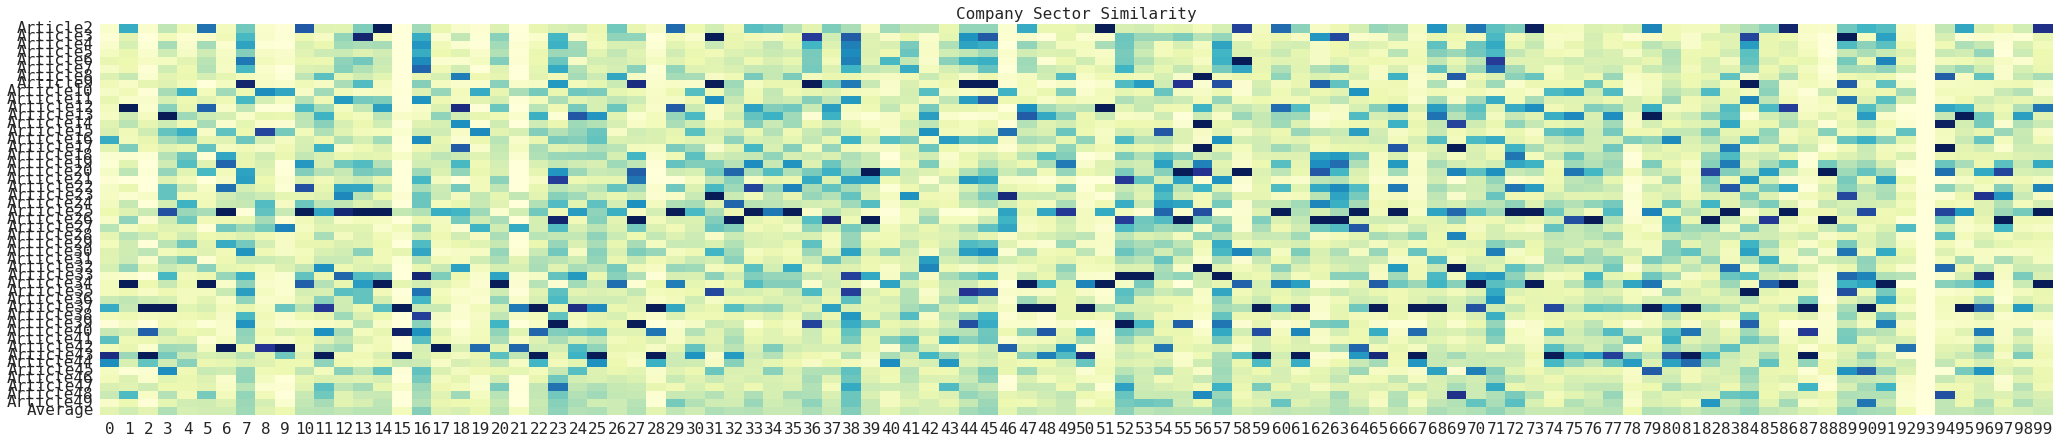

In [56]:
# Test visualization

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
n_topics=100

#Trained
#companies = [ (0, 480), (0, 467), (0, 426) ]  #Unrelated
#companies = [ (0, 100), (0, 194), (0, 192) ]  # Related Banks
#Test
companies = []
for i in range(102,150):
    companies.append((1,i))

topic_vectors = np.zeros([len(companies)+1,n_topics])
labels,i = [],0
for (s, num) in companies:
  by_topic=dat['doc_topic_dists'] if s==0 else doc_to_topic
  topic_vectors[i] = (by_topic[num])
  labels.append(names[num][:-4] if s==0 else test_names[num][:-4])  
  i+=1

av_by_topic = np.array( topic_vectors ).mean( axis=0 )
topic_vectors[i] = av_by_topic
labels.append("Average")
# topic_vectors[:,23] = 0
# topic_vectors[:,27] = 0
# topic_vectors[:,39] = 0
# topic_vectors[:,43] = 0
# topic_vectors[:,52] = 0
# topic_vectors[:,53] = 0
# topic_vectors[:,57] = 0
# doc_sim_list = []
# for j in range(503):
#     doc_topicav_sim = scipy.spatial.distance.cosine(dat['doc_topic_dists'][j],av_by_topic)
#     doc_sim_list += [(j,names[j],doc_topicav_sim)]
    
# sorted_docs_by_average = sorted(doc_sim_list, key=lambda x: x[2])
# similar_docs = [sorted_docs_by_average[idx] for idx in range(2)] 
# print similar_docs
# for doc in similar_docs:
#     i+=1
#     topic_vectors[i] = dat['doc_topic_dists'][doc[0]]
#     labels.append(doc[1])
    
    
# doc_sim_list = []
# for j in range(503):
#     doc_topicav_sim = abs(dat['doc_topic_dists'][j,20]-av_by_topic[20])
#     doc_sim_list += [(j,names[j],doc_topicav_sim)]
    
# sorted_docs_by_average = sorted(doc_sim_list, key=lambda x: x[2])
# similar_docs = [sorted_docs_by_average[idx] for idx in range(2)] 

# for doc in similar_docs:
#     i+=1
#     topic_vectors[i] = dat['doc_topic_dists'][doc[0]]
#     labels.append(doc[1])


plt.rcParams['figure.figsize']=(35,7)
ax = plt.axes()

rc={'font.size': 32, 'axes.labelsize': 32, 'legend.fontsize': 32.0, 
    'axes.titlesize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16}
plt.rcParams.update(**rc)

sns.heatmap(topic_vectors,cmap="YlGnBu",yticklabels=labels,robust=True,cbar=False)
ax.set_title('Company Sector Similarity')
plt.show()

/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/seaborn-0.7.1-py2.7.egg/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/seaborn-0.7.1-py2.7.egg/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:
/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/seaborn-0.7.1-py2.7.egg/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/home/malaviyac/lda2vec/env/lib/python2.7/site-packages/seaborn-0.7.1-py2.7.egg/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


<Container object of 100 artists>

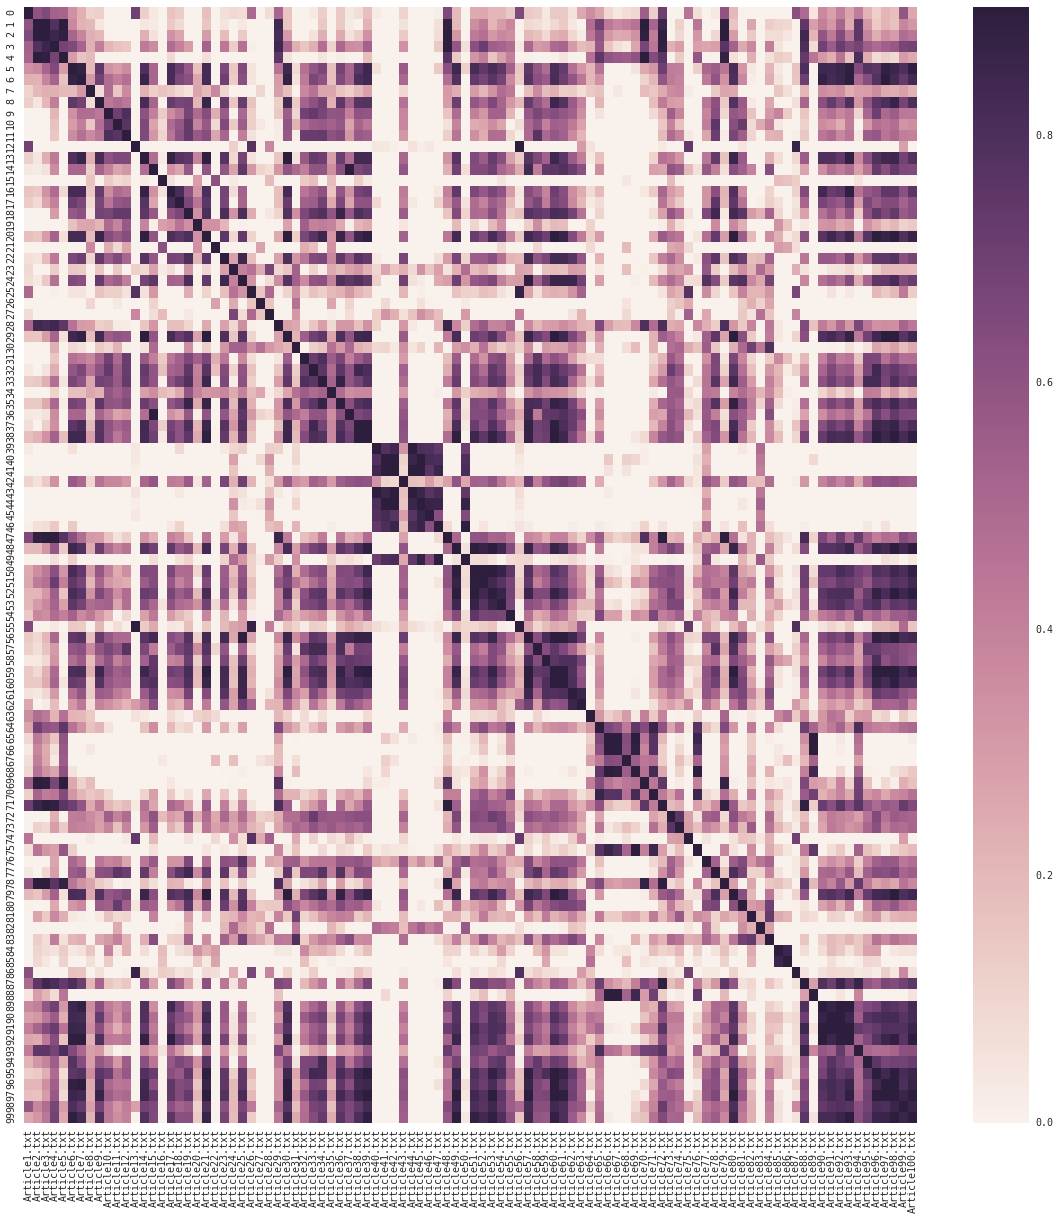

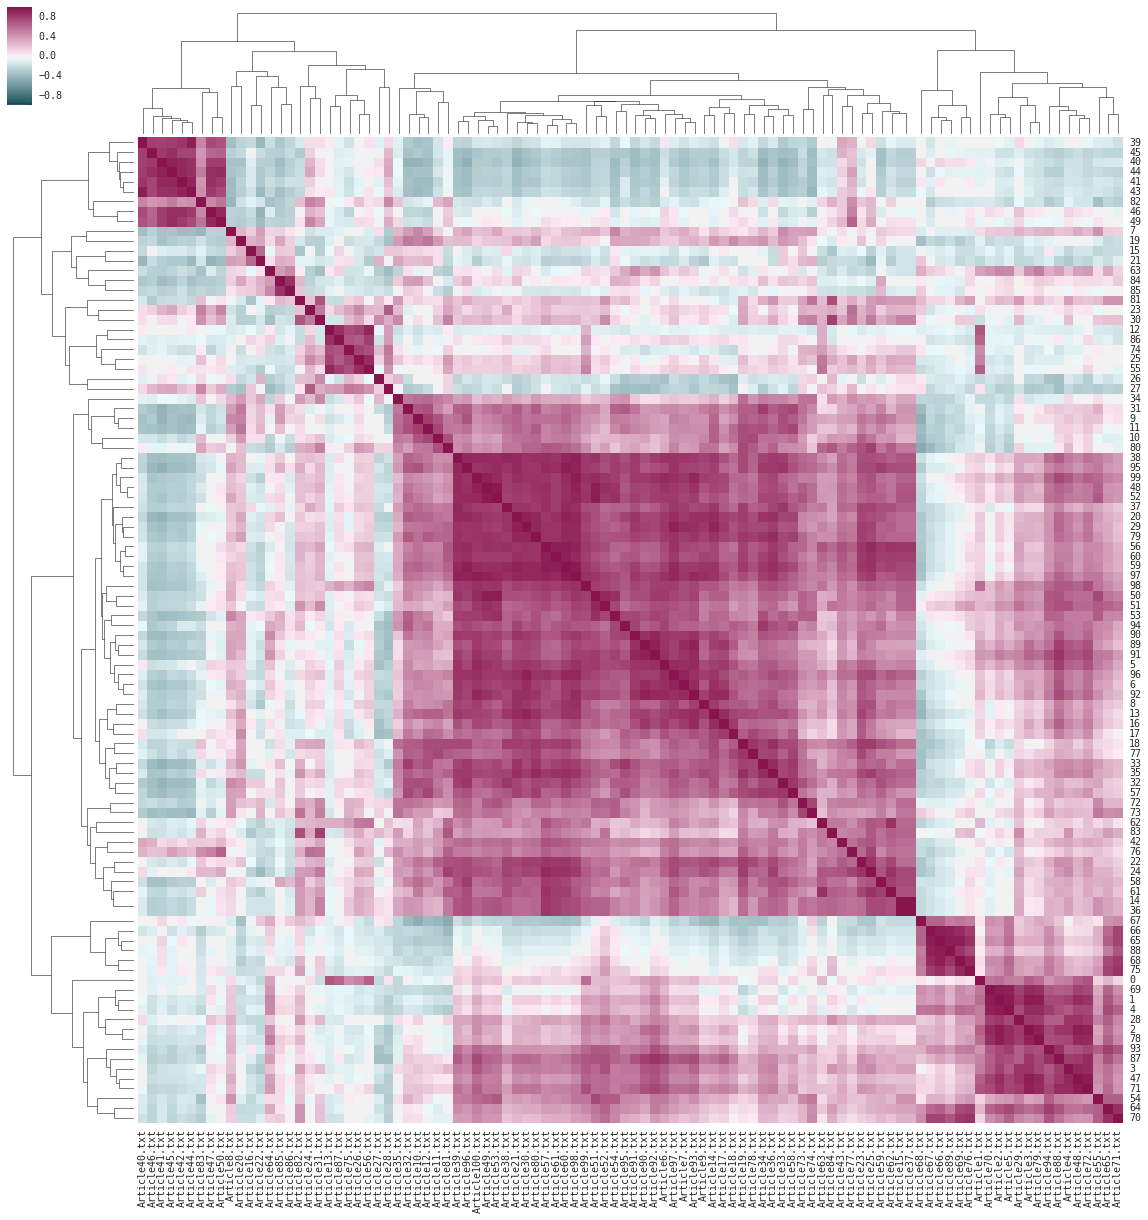

In [32]:
article_sim_matrix = np.zeros((len(doc_to_topic),len(doc_to_topic)))
for i in range(len(doc_to_topic)):
    for j in range(len(doc_to_topic)):
        article_sim_matrix[i,j] = 1-scipy.spatial.distance.correlation(doc_to_topic[i],doc_to_topic[j])
# for i in range(len(doc_to_topic)):
#     article_sim_matrix[i,i] = 1
        
df = pd.DataFrame(article_sim_matrix[0:100,0:100], columns=test_names[0:100])
sns.set(font="monospace")

# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
plt.rcParams['figure.figsize']=(20,20)
ax = plt.axes()
sns.heatmap(df,vmin=0,robust=True)
sns.clustermap(df,figsize=(20, 20), cmap=cmap)
plt.bar(np.arange(100), dat['doc_topic_dists'][447])